# Домашня робота №7

# Перетворення випадкових величин та векторів

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## 1 Нормальний розподіл

### 1.1 Завдання 1.1

Розглянемо три незалежні випадкові величини $\xi_1, \xi_2, \theta$ такі,
що $\xi_1, \xi_2 \sim N(0, 1), \theta \sim Uniform(0, 2 \pi)$.

Який розподіл має випадкова величина $\displaystyle \zeta = \xi_1 \cos \theta + \xi_2 \sin \theta$?
1. Згенеруйте $n = 10000$ значень випадкових величин $\xi_1, \xi_2, \theta$;
2. Отримайте $n = 10000$ значень випадкової величини $\zeta$;
3. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\zeta$;
   - функцію щільності випадкової величини $\zeta$.

**Зауваження.** Передбачається використання теореми про лінійне перетворення нормальних величин.

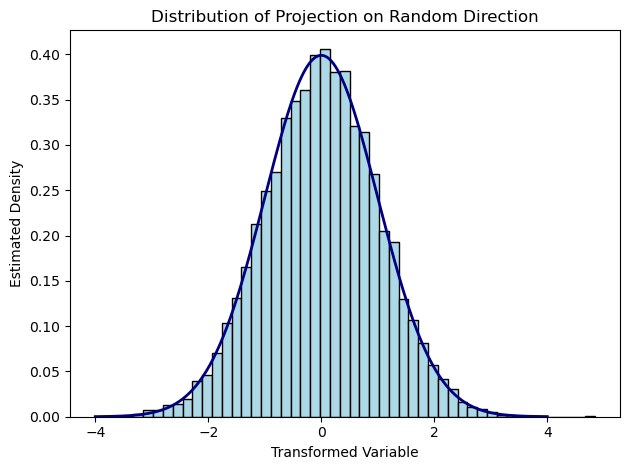

In [1]:
#місце для коду
import numpy as np
import matplotlib.pyplot as plt

sample_size = 10_000
u = np.random.normal(size=sample_size)
v = np.random.normal(size=sample_size)
angles = 2 * np.pi * np.random.uniform(size=sample_size)

combined = u * np.cos(angles) + v * np.sin(angles)

fig, ax = plt.subplots()
ax.hist(combined, bins=50, density=True, color='lightblue', edgecolor='black')

domain = np.linspace(-4, 4, 400)
gauss_pdf = np.exp(-domain**2 / 2) / np.sqrt(2 * np.pi)
ax.plot(domain, gauss_pdf, color='navy', linewidth=2)

ax.set_xlabel("Transformed Variable")
ax.set_ylabel("Estimated Density")
ax.set_title("Distribution of Projection on Random Direction")

plt.tight_layout()
plt.show()


### 1.1 Завдання 1.2

Розглянемо дві незалежні випадкові величини $\xi_1, \xi_2$ зі стандартного нормального розподілу.
Тобто $\xi_1, \xi_2 \sim N(0, 1)$.

Які розподіли (щільності) мають випадкові величини $\displaystyle \zeta = \sqrt{\xi_1^2 + \xi_2^2}, \eta = \arccos \frac{\xi_1}{\zeta}$?
1. Згенеруйте $n = 10000$ значень випадкових величин $\xi_1, \xi_2$;
2. Отримайте $n = 10000$ значень випадкової величини $\zeta$;
3. Отримайте $n = 10000$ значень випадкової величини $\eta$;
4. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\zeta$;
   - функцію щільності випадкової величини $\zeta$;
5. Зобразіть на графіку:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\eta$.

**Зауваження 1.** Передбачається використання теореми про обрахунок щільності функції від випадкової величини (через якобіан оберненого відображення).

**Зауваження 2.** Насправді, розподіл отриманих значень випадкової величини $\eta$ буде трохи відрізнятися від порахованого теоретично (будуть інші параметри).
Так виходить за рахунок реалізації функції $\arccos$ (її області значень).

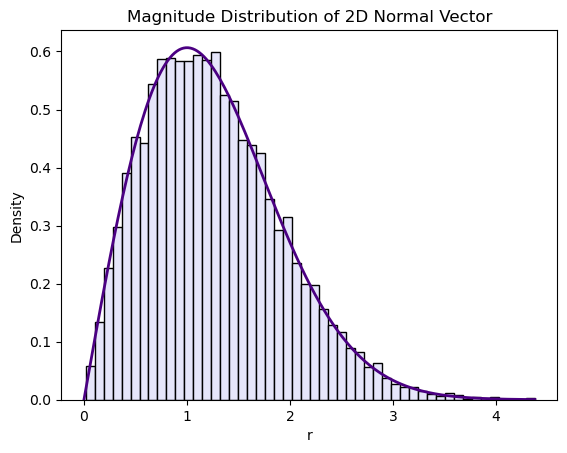

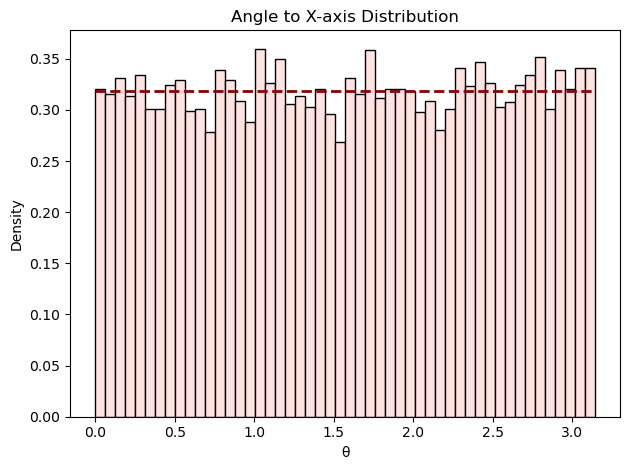

In [2]:
#місце для коду
import numpy as np
import matplotlib.pyplot as plt

count = 10_000
x_vals = np.random.normal(size=count)
y_vals = np.random.normal(size=count)

radius = np.hypot(x_vals, y_vals)
angle = np.arccos(np.clip(x_vals / radius, -1, 1))

fig1, ax1 = plt.subplots()
ax1.hist(radius, bins=50, density=True, color='lavender', edgecolor='black')

r_space = np.linspace(0, radius.max(), 200)
density_r = r_space * np.exp(-r_space**2 / 2)
ax1.plot(r_space, density_r, color='indigo', linewidth=2)

ax1.set_title("Magnitude Distribution of 2D Normal Vector")
ax1.set_xlabel("r")
ax1.set_ylabel("Density")

fig2, ax2 = plt.subplots()
ax2.hist(angle, bins=50, density=True, color='mistyrose', edgecolor='black')

theta_space = np.linspace(0, np.pi, 200)
density_theta = np.full_like(theta_space, 1 / np.pi)
ax2.plot(theta_space, density_theta, color='darkred', linestyle='--', linewidth=2)

ax2.set_title("Angle to X-axis Distribution")
ax2.set_xlabel("θ")
ax2.set_ylabel("Density")

plt.tight_layout()
plt.show()
